This is the HW1 of the subject.

In [679]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rand

In [680]:
global orange 
global blue
global N

N = 100 # Number of initial points

orange = [] 
blue = []

w1 = 0.3
w2 = round(1.0 - w1, 2)
w3 = 0.8
w4 = round(1.0 - w3, 2)

classes = 2

w = [w1, w2, w3, w4]
pho = [1, 1, -3, 2]

def plot(x, y, col):
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Gaussian distribution")
    plt.scatter(x, y, color = col)
    plt.show()

def f(w, pho, str):
    f = []
    if str == 'orange':
        index = [0, 1]
    elif str == 'blue':
        index = [2, 3]        
    f.append(w[index[0]] * rand.gauss(pho[index[0]], 1))
    f.append(w[index[1]] * rand.gauss(pho[index[1]], 1))
    return f

variance_mat = np.identity(2)


After having defined the main variables and functions, the main program will be coded.

In [681]:
def main():
    global blue
    global orange
    orange = []
    blue = [] 
    for i in range(int(N/classes)):
        orange.append(f(w, pho, 'orange'))
        blue.append(f(w, pho, 'blue'))
    orange = pd.DataFrame(orange)
    blue = pd.DataFrame(blue)    

main()



orange.head()




,0,1
0,0.845724,0.956910
1,0.618113,0.081515
2,0.204459,0.698555
3,0.166033,-0.844541
4,0.277497,0.309215


Once having sampled the Gaussian distribution and having obtained the statistical data, we will perform some Data Exploration for making sure the created data samples are right.

In [682]:
print("ORANGE CLASS DATAFAME EXPLORATION \n")
orange.describe()

ORANGE CLASS DATAFAME EXPLORATION 



,0,1
count,50.000000,50.000000
mean,0.312343,0.591367
std,0.330786,0.742330
min,-0.397704,-1.484515
25%,0.056604,0.206965
50%,0.277877,0.549835
75%,0.620459,0.903523
max,0.982868,2.702157


In [683]:
print("BLUE CLASS DATAFAME EXPLORATION \n")
blue.describe()

BLUE CLASS DATAFAME EXPLORATION 



,0,1
count,50.000000,50.000000
mean,-2.369783,0.366441
std,0.841756,0.176464
min,-4.034153,-0.015373
25%,-2.849277,0.243534
50%,-2.444129,0.384626
75%,-1.911033,0.447784
max,-0.534382,0.762233


After the basic data exploration, we have verified that the mean of the sampled data is the same as we expected (0.3, 0.7, 0.8 * -3 = -2.4, 0.2 * 2).
Now, we will proceed to plot the data into a 2-D map. First of all, each class individually. Then, both of them in the same 2-D plot.

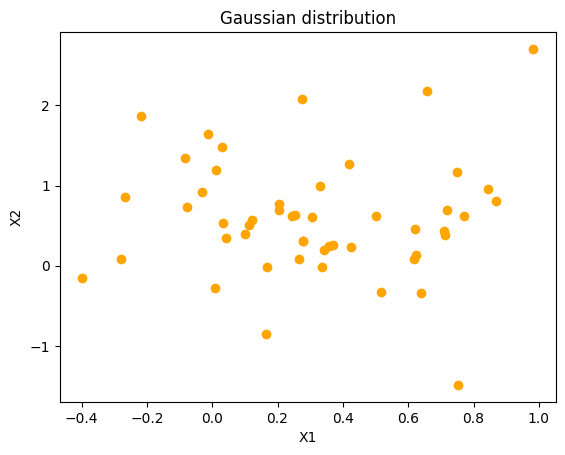

In [684]:
plot(orange.loc[:, 0], orange.loc[:, 1], 'orange')

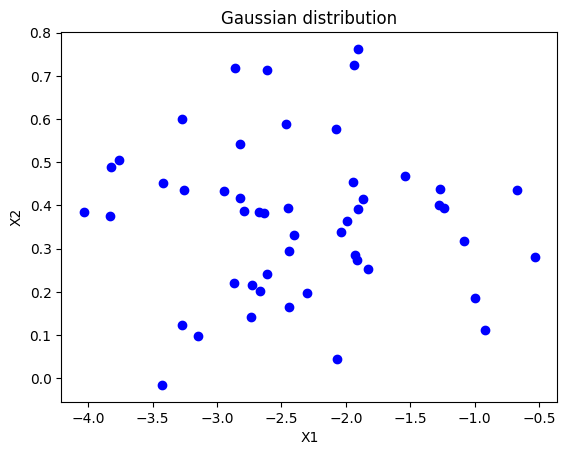

In [685]:
plot(blue.loc[:, 0], blue.loc[:, 1], 'blue')

Now, we will plot both distributions at once.

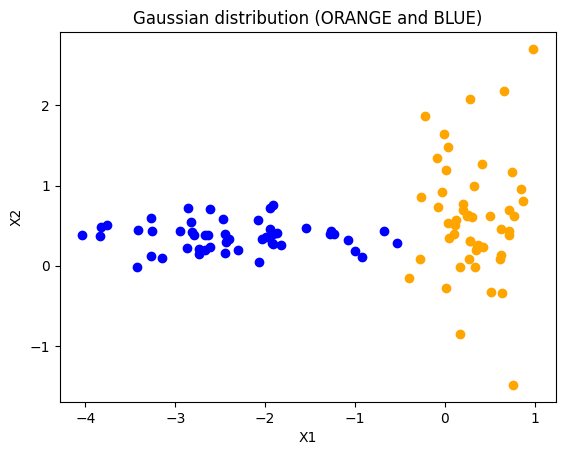

In [686]:
def double_plot(orange, blue):
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Gaussian distribution (ORANGE and BLUE)")
    plt.scatter(orange.loc[:, 0], orange.loc[:, 1], color = 'orange')
    plt.scatter(blue.loc[:, 0], blue.loc[:, 1], color = 'blue')
    plt.show()

    
double_plot(orange, blue)


Finally, we will step by step increase the number of points created in order to see how the distribution sampling changes gets more precise. 

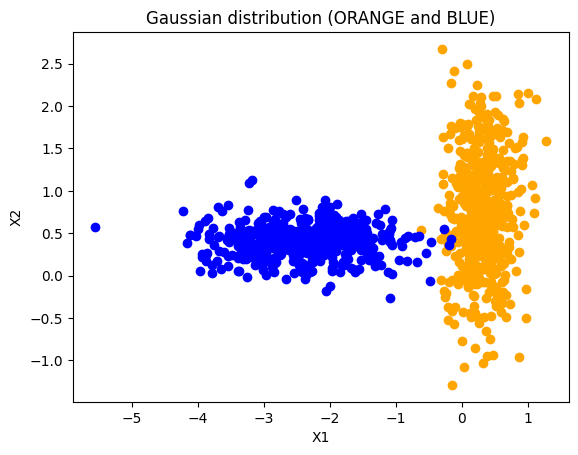

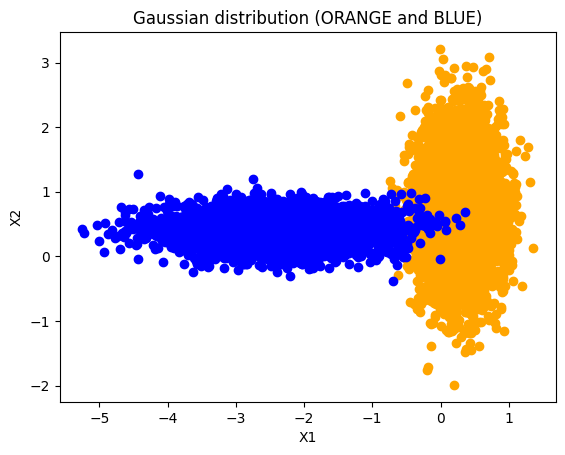

In [687]:
for i in range(2):
    N = N * 10
    main()
    double_plot(orange, blue)

2) a) k = 15

In [688]:
global k
k = 15
N = 2 * 100
main()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

size_or = np.size(orange, 0)
size_bl = np.size(orange, 0)
orange['class'] = np.ones(size_or) #orange class = 1
blue['class'] = np.zeros(size_bl) #blue class = 0

df = orange.append(blue)
df.describe()
df = df.sample(np.size(df, 0))
df.head()
knn = KNeighborsClassifier(n_neighbors = k)
  
print(df)

X_train = df.loc[:, [0, 1]]
y_train = df.loc[:, 'class']


knn.fit(X_train, y_train)

# Predict on dataset which model has not seen before
print(knn.predict(X_train.head(5)))

print(knn.weights)




           0         1  class
61 -2.011154  0.385886    0.0
78 -2.653191  0.284038    0.0
57 -3.449844  0.633511    0.0
29 -0.323984  0.095368    1.0
28  0.580457  0.078067    1.0
..       ...       ...    ...
19 -2.691719  0.307615    0.0
96 -2.173736  0.293552    0.0
61  0.307583  1.509748    1.0
28 -2.523166  0.693598    0.0
10 -1.548300  0.563563    0.0

[200 rows x 3 columns]
[0. 0. 0. 1. 1.]
uniform


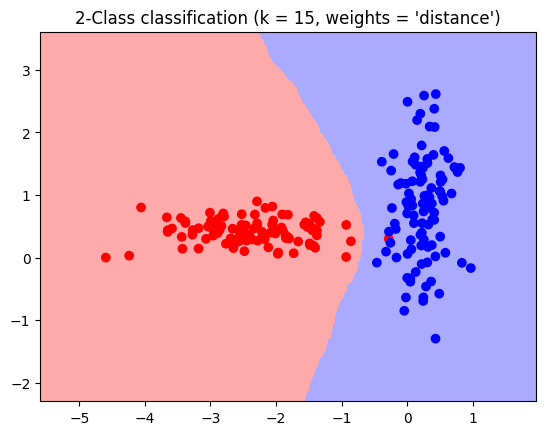

In [689]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

X = X_train
y = y_train
n_neighbors = k

# print(X)
# print(y)


margin = 0.25
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.loc[:, 0].min() - 1, X.loc[:, 0].max() + 1
    y_min, y_max = X.loc[:, 1].min() - 1, X.loc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X.loc[:, 0], X.loc[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

2) a) Using the linear model

[0.31530166 0.03848399]
                0
count  200.000000
mean     0.500000
std      0.458538
min     -0.633485
25%      0.093502
50%      0.691330
75%      0.921087
max      1.123968
0    0.69133
dtype: float64


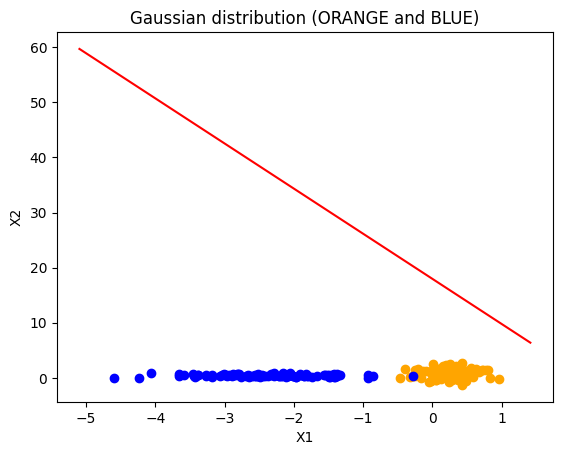

In [719]:
from sklearn import linear_model
model = linear_model.LinearRegression()
iter = 100.0

model.fit(X, y)
weights = model.coef_
print(weights)
predictions = model.predict(X)
predictions = pd.DataFrame(predictions)
print(predictions.describe())
boundary = predictions.median()
print(boundary)

X_min = X.loc[:, 0].min()
X_max = X.loc[:, 0].max()
boundary_y = []
boundary_x = np.arange(X_min - 0.5, X_max + 0.5, (X_max + 0.5 - X_min - 0.5) / iter)

for i in range(len(boundary_x)):
    boundary_y.append(boundary / weights[1] - weights[0] / weights[1] * boundary_x[i])

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Gaussian distribution (ORANGE and BLUE)")
plt.scatter(orange.loc[:, 0], orange.loc[:, 1], color = 'orange')
plt.scatter(blue.loc[:, 0], blue.loc[:, 1], color = 'blue')
plt.plot(boundary_x, boundary_y, 'red')
plt.show()

